In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

df=pd.read_csv(r"C:\Users\HP\.jupyter\coffee_dataset.csv")

In [163]:
#create a sample from our data
sample_df=df.sample(150)

In [164]:
#create our bootstrap sample
bootsample=sample_df.sample(150,replace=True)

In [165]:
means=[]
for _ in range(1000):
    bootsample=sample_df.sample(150,replace=True)
    means.append(bootsample.height.mean())

In [166]:
low,high=np.percentile(means,2.5),np.percentile(means,97.5)

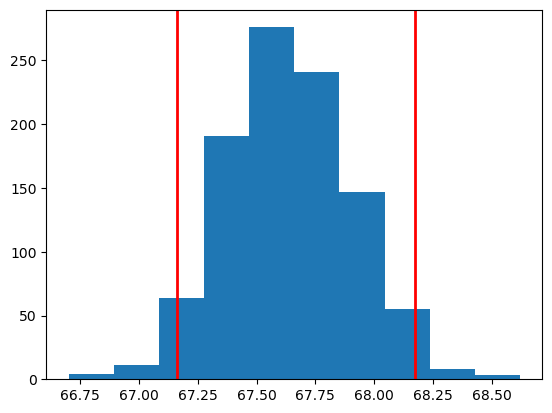

In [167]:
plt.hist(means)
plt.axvline(low,color='r',linewidth=2)
plt.axvline(high,color='r',linewidth=2);

### Simulating from the Null

In [168]:
#Get the standard deviation 
sd=np.std(means)
sd

0.26261454805639556

In [169]:
null_vals=np.random.normal(70,sd,10000)

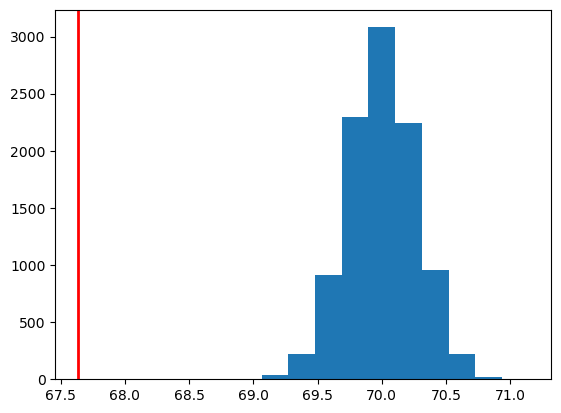

In [170]:
plt.hist(null_vals);
plt.axvline(sample_df.height.mean(),color='r',linewidth=2)

### Notebook + Quiz: Simulating from the Null

In [171]:
full_data = pd.read_csv(r"C:\Users\HP\.jupyter\coffee_dataset.csv")
sample_data = full_data.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

In [172]:
sample_data

,user_id,age,drinks_coffee,height
855,5335,>=21,True,70.644185
2068,3599,>=21,False,72.669043
2363,3266,>=21,True,70.058675
374,4066,>=21,True,65.982215
2412,3031,<21,False,66.188290
...,...,...,...,...
1453,4539,<21,False,66.235538
1061,5911,<21,True,64.964105
1997,3267,<21,False,62.467109
2560,2424,>=21,True,69.823643


In [173]:
sample_data[sample_data['drinks_coffee']]['height'].mean()

68.37742725889422

In [174]:
np.std(sample_data[sample_data['drinks_coffee']]['height'])

2.7121859660218353

In [175]:
sample_data[sample_data['drinks_coffee'] == False]['height'].mean()

66.3661231722277

In [176]:
np.std(sample_data[sample_data['drinks_coffee'] == False]['height'])

3.4361444155862984

-----------------------------------------------------------------------------------------------------------------

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [177]:
co_means=[]
nco_means=[]
diff_means=[]
for _ in range(10000):
    bootsample=sample_df.sample(200,replace=True)
    co_mean=bootsample[bootsample['drinks_coffee']==True]['height'].mean()
    nco_mean=bootsample[bootsample['drinks_coffee']==False]['height'].mean()
    #append
    co_means.append(co_mean)
    nco_means.append(nco_mean)
    diff_means.append(co_mean-nco_mean)
        

In [178]:
np.std(co_means)

0.24633897906388122

In [179]:
np.std(nco_means)

0.43772999357485376

In [180]:
np.std(diff_means)

0.5052846330249355

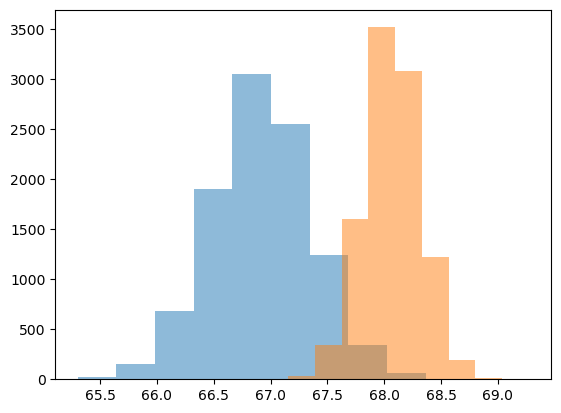

In [181]:
plt.hist(nco_means,alpha=0.5);
plt.hist(co_means,alpha=0.5);

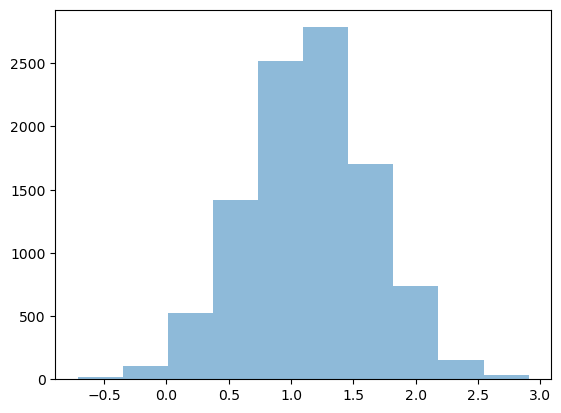

In [182]:
plt.hist(diff_means,alpha=0.5);

In [183]:
nul_vals=np.random.normal(0,np.std(diff_means),1000)

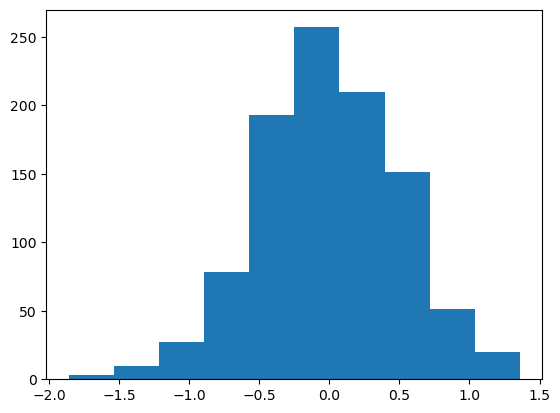

In [184]:
plt.hist(nul_vals);

--------------------------------------------------------------------------------------------------------------------

### Calculating the p-value

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

df=pd.read_csv(r"C:\Users\HP\.jupyter\coffee_dataset.csv")

In [186]:
#create a sample from our data
sample_df=df.sample(150)

In [187]:
#create our bootstrap sample
bootsample=sample_df.sample(150,replace=True)

In [188]:
means=[]
for _ in range(1000):
    bootsample=sample_df.sample(150,replace=True)
    means.append(bootsample.height.mean())

In [189]:
#Get the standard deviation 
sd=np.std(means)
sd

0.26261454805639556

In [190]:
null_vals=np.random.normal(70,sd,10000)
null_vals

array([69.93265121, 69.82654768, 70.22983497, ..., 69.79871662,
       69.99862024, 69.82615313])

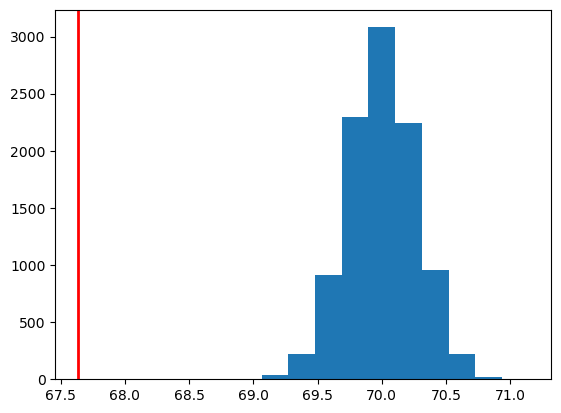

In [191]:
plt.hist(null_vals);
plt.axvline(sample_df.height.mean(),color='r',linewidth=2);

In [192]:
#Find the sample mean
sample_mean = sample_df.height.mean()
sample_mean

67.63297688228066

In [193]:
#Calculate the P-value
(null_vals > sample_mean).mean()

1.0

New scenario

$H_0: \mu \geq 70$

$H_1: \mu < 70$

In [194]:
(null_vals < sample_mean).mean()

0.0

New scenario

$H_0: \mu = 70$

$H_1: \mu \neq 70$

In [195]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean +(null_mean - sample_mean)).mean()

0.0

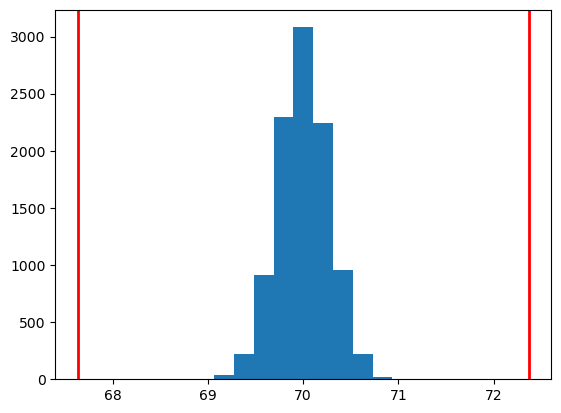

In [196]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals);
plt.axvline(low,color='r', linewidth=2)
plt.axvline(high,color='r', linewidth=2);

### Calculating Errors

In [197]:
import numpy as np
import pandas as pd

jud_data=pd.read_csv(r"C:\Users\HP\.jupyter\judicial_dataset_predictions.csv")
par_data=pd.read_csv(r"C:\Users\HP\.jupyter\parachute_dataset.csv")

In [198]:
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [199]:
par_data.head()

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.

In [200]:
jud_data[jud_data['actual']!= jud_data['predicted']].shape[0]/jud_data.shape[0]# Number of errors
#shape[0] mean number of rows

0.042152958945489497

In [201]:
jud_data.query("actual=='innocent' and predicted=='guilty'").shape[0]/jud_data.shape[0] #Type 1 error

0.001510366607167376

In [202]:
jud_data.query("actual=='guilty' and predicted=='innocent'").shape[0]/jud_data.shape[0] #Type 2 error

0.04064259233832212

In [203]:
# If everyone was predicted to be guilty, then every actual innocent 
# person would be a type I error.

# Type I = pred guilty, but actual = innocent
jud_data.query("actual=='innocent'").shape[0]/jud_data.shape[0]

0.45159961554304545

In [204]:
#If everyone has prediction of guilty, then no one is predicted inncoent
#Therefore, there would be no type 2 errors in this case

# Type II errs = pred innocent, but actual = guilty
0


0

`2.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 2 below.

In [205]:
par_data[par_data['actual']!= par_data['predicted']].shape[0]/par_data.shape[0]# Number of errors
#shape[0] mean number of rows

0.039972551037913875

In [206]:
par_data.query('actual=="fails" and predicted == "opens"').shape[0]/par_data.shape[0] #type 1 error

0.00017155601303825698

In [207]:
par_data.query('actual=="opens" and predicted == "fails"').shape[0]/par_data.shape[0]# type 2 error

0.03980099502487562

In [208]:
par_data.query('actual=="fails"').shape[0]/par_data.shape[0]

0.008234688625836336

In [209]:
par_data.query('actual=="opens"').shape[0]/par_data.shape[0]

0.9917653113741637

### The Impact of Large Sample Sizes

In [210]:
full_data = pd.read_csv(r"C:\Users\HP\.jupyter\coffee_dataset.csv")

In [211]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

mean population 67.5975
standara deviation population 3.1194
mean sample 67.2522
standara deviation sample 2.2575
Standard deviation of the sampling distribution 0.9097


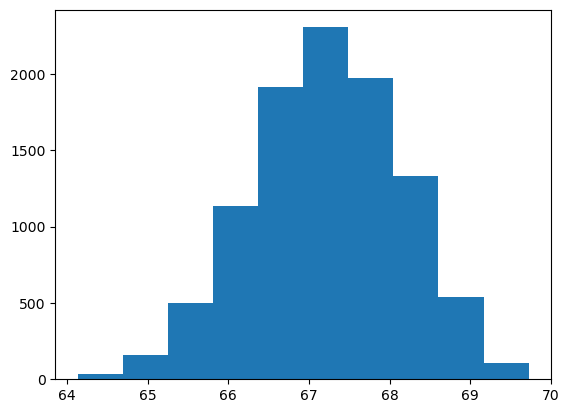

In [212]:
sample1 = full_data.sample(5, random_state=1)
pop_height_mean=np.round(full_data.height.mean(),4)
pop_height_std=np.round(full_data.height.std(),4)
sam_height_mean=np.round(sample1.height.mean(),4)
sam_height_std=np.round(sample1.height.std(),4)

print('mean population',pop_height_mean)
print('standara deviation population',pop_height_std)
print('mean sample',sam_height_mean)
print('standara deviation sample',sam_height_std)

sd_mean5=[]
for _ in range(10000):
    sample_5=sample1.sample(5,replace=True)
    mean_5=sample_5.height.mean()
    sd_mean5.append(mean_5)
    
std_sd_mean5=np.round(np.std(sd_mean5),4)    
print('Standard deviation of the sampling distribution',std_sd_mean5)
plt.hist(sd_mean5);

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

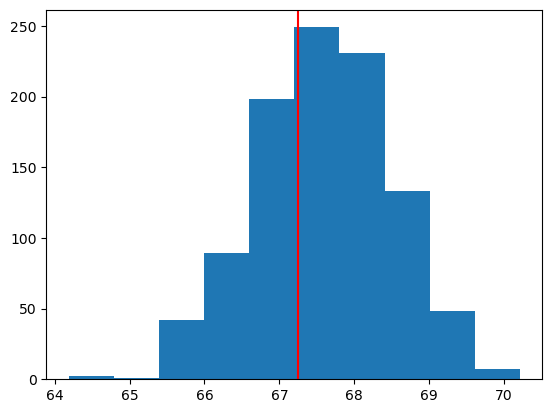

In [213]:
null_mean=67.5975
null_values=np.random.normal(null_mean,std_sd_mean5,1000)

plt.hist(null_values)
plt.axvline(x=sample1.height.mean(),color='r');# where our sample mean falls on null dist

In [217]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean()

# probability of a statistic higher than observed
prob_more_extreme_high = (null_values > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_values).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval = np.round(pval, 4)
print(pval)

1.284


67.25218816122813 67.94281183877186


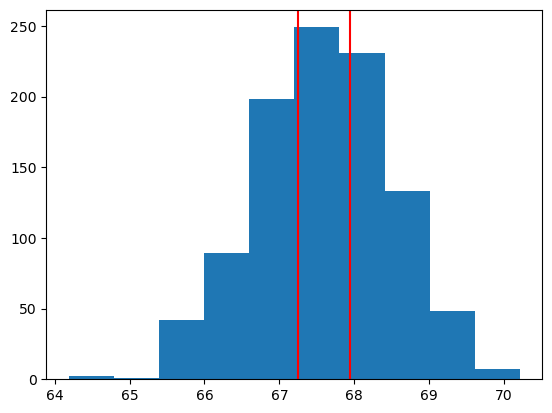

In [221]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)
print(upper_bound, lower_bound)

plt.hist(null_values);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

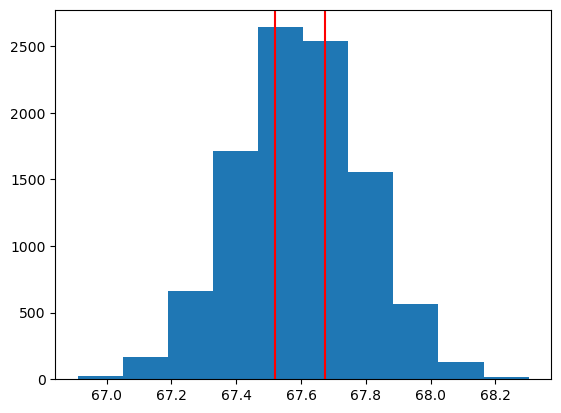

In [226]:
sample2 = full_data.sample(300)
#obs_mean = sample2.height.mean()

sampling_dist_mean300 = []

for _ in range(10000):
    sample_of_300 = sample2.sample(300, replace = True)
    sample_mean = sample_of_300.height.mean()
    sampling_dist_mean300.append(sample_mean)
    
std_sampling_dist300 = np.std(sampling_dist_mean300)    
null_vals = np.random.normal(null_mean, std_sampling_dist300, 10000)

upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

### Multiple Tests

In [232]:
df=pd.read_csv(r"C:\Users\HP\.jupyter\judicial_dataset_pvalues.csv")

`2.` If we consider each individual as a single hypothesis test, find the conservative Bonferroni corrected p-value we should use to maintain a 5% type I error rate.

In [233]:
bonf_alpha=0.5/df.shape[0]
bonf_alpha

6.86530275985171e-05

`3.` What is the proportion of type I errors made if the correction isn't used?  How about if it is used?  

Use your answers to find the solution to **Quiz 3** below.

In [234]:
df.query("actual == 'innocent' and pvalue < 0.05").count()[0]/df.shape[0] # If not used

0.001510366607167376

In [235]:
df.query("actual == 'innocent' and pvalue < @bonf_alpha").count()[0]/df.shape[0] # If used

0.0